# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df=pd.read_csv('HRV.csv')

## Dataset Preprocessing

In [3]:
df.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.tail()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4229,1,50,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4230,1,51,1,207.0,126.5,80.0,19.71,65.0,68.0,0
4231,0,48,1,248.0,131.0,72.0,22.00,84.0,86.0,0
4232,0,44,1,210.0,126.5,87.0,19.16,86.0,NaN,0
4233,0,52,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [6]:
df.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#checking for missing values
df.isna().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [9]:
#filling in missing values for total cholestoral
totChol_mean=df['totChol'].mean()
print(totChol_mean)
df['totChol'].fillna(totChol_mean, inplace=True)
# checking if the null value has been filled
df['totChol'].isnull().sum()

236.72323135755258


0

In [10]:
#filling in missing values for BMI
bmi_mean=df['BMI'].mean()
print(bmi_mean)
df['BMI'].fillna(bmi_mean, inplace=True)
# checking if the null value has been filled
df['BMI'].isnull().sum()

25.800623962040333


0

In [11]:
#filling in missing values for heartrate
heartRate_mean=df['heartRate'].mean()
print(heartRate_mean)
df['heartRate'].fillna(heartRate_mean, inplace=True)
# checking if the null value has been filled
df['heartRate'].isnull().sum()

75.88282541932436


0

In [12]:
#filling in missing values for glucose
glucose_mean=df['glucose'].mean()
print(glucose_mean)
df['glucose'].fillna(glucose_mean, inplace=True)
# checking if the null value has been filled
df['glucose'].isnull().sum()

81.97608526124253


0

In [13]:
#checking that there is no more null values
df.isna().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

### Create independent and dependent variables to predict 

In [14]:
#Splitting the dataset into independent and dependent variable
x=df[['male', 'age', 'currentSmoker', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
y=df[['totChol']]

## Splitting the dataset into the Training set and Test set

In [15]:
#Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

## Training the Linear Regression model 

In [16]:
#Training the Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
#Printing the Intercept and Coefficient
print(f"Coefficient: {regressor.coef_}") 
print(f"Intercept: {regressor.intercept_}")

Coefficient: [[-7.69389556  1.17839024  2.23080452  0.0846499   0.25580816  0.62710148
   0.14239754  0.03052255  0.63724312]]
Intercept: [118.25993075]


In [18]:
#Predicting the test set results
y_pred=regressor.predict(x_test.values)

## Model performance check- R Square and RMSE score

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-Square: {r2_score(y_test, y_pred):.2f}")

RMSE: 45.21
R-Square: 0.06


## Predicting new results where the actual results are given
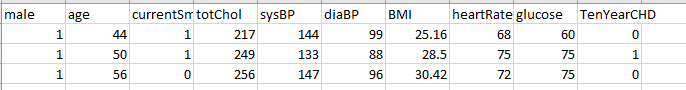

In [23]:
# case 1 actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([[229.4528633]])

In [24]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([[236.96454907]])

In [25]:
# case 3 actual 256
regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

array([[245.17524904]])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

### Create independent and dependent variables to predict

In [26]:
x=df[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y=df[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=0)

## Training the Logistic Regression model 

In [30]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train.values,y_train)

LogisticRegression()

In [31]:
#Predicting test set result
y_pred=classifier.predict(x_test.values)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)
classifier.classes_

[[1178    4]
 [ 210    6]]


array([0, 1], dtype=int64)

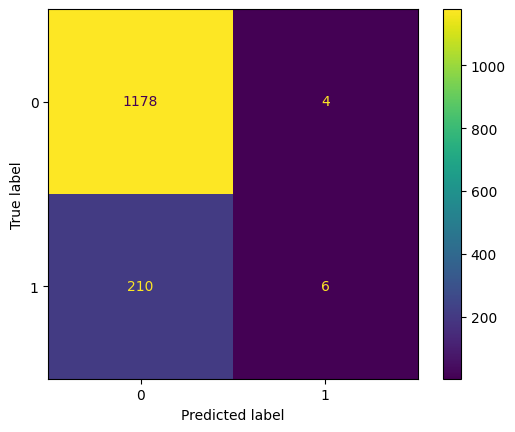

In [35]:
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
display.plot()
plt.show()

### Discuss the results

### (True Negative) 1178 do not have a 10 year risk of coronary heart disease CHD and the model correctly predicted these people do not have a 10 year risk of CHD
### (True Positive) 6 have a 10 year risk of coronary heart disease CHD and the model correctly predicted these people have a 10 year risk of CHD
### (False Positive) 4 do not have a 10 year risk of coronary heart disease CHD and the model predicted these people have a 10 year risk of CHD
### (False Negative) 210 have a 10 year risk of coronary heart disease CHD and the model predicted these people do not have a 10 year risk of CHD

## Predicting new results where the actual results are given
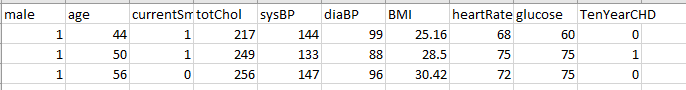

In [36]:
classifier.predict([[1,44,1,217,144,99,25.26,68,60]])

array([0], dtype=int64)

In [37]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75]])

array([0], dtype=int64)

In [38]:
classifier.predict([[1,56,0,256,147,96,30.42,72,75]])

array([0], dtype=int64)

### Summary

We first found the dataset has missing values. Including total Cholestoral, heartrate, BMI, and glucose. We used mostly mean to fill in the missing values. For our linear regression, we got an RMSE score of 45.21 and our R-squared value was 0.06. When predicting cases, we found that they were within the range. For the logistic regression model, we found it has more zeros than ones which implies that the dataset is unbalanced. Based on the heatmap correlation matrix, we got mostly true negative 1178 people and we had a few true positive of 6 people. This implies that the logistic regression model did a fairly good job. Though the false negative value was slightly high with 210 people. 